In [2]:
import numpy as np
import pandas as pd

In [3]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname,filename))

In [4]:
df_train = pd.read_csv(r'C:\Users\shash\Downloads\train.csv')
df_test  = pd.read_csv(r'C:\Users\shash\Downloads\test.csv')

In [5]:
base_path = '../input/house-prices-advanced-regression-techniques'

In [6]:
df_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [7]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [8]:
print(df_train.columns)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [9]:
features = ['MSZoning', 'LotArea', 'Street', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'ExterQual', 
            'Foundation',  'Electrical', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
        'GarageType', 'GarageCars', 'GarageArea', 'MoSold', 'YrSold',
            'SaleType', 'SaleCondition', 'SalePrice'
           ]

In [10]:
data = df_train[features]

In [11]:
data.isna().sum()

MSZoning          0
LotArea           0
Street            0
Utilities         0
LotConfig         0
LandSlope         0
Neighborhood      0
YearBuilt         0
YearRemodAdd      0
RoofStyle         0
RoofMatl          0
ExterQual         0
Foundation        0
Electrical        1
FullBath          0
HalfBath          0
BedroomAbvGr      0
KitchenAbvGr      0
GarageType       81
GarageCars        0
GarageArea        0
MoSold            0
YrSold            0
SaleType          0
SaleCondition     0
SalePrice         0
dtype: int64

In [12]:
data.head()

,MSZoning,LotArea,Street,Utilities,LotConfig,LandSlope,Neighborhood,YearBuilt,YearRemodAdd,RoofStyle,...,BedroomAbvGr,KitchenAbvGr,GarageType,GarageCars,GarageArea,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,RL,8450,Pave,AllPub,Inside,Gtl,CollgCr,2003,2003,Gable,...,3,1,Attchd,2,548,2,2008,WD,Normal,208500
1,RL,9600,Pave,AllPub,FR2,Gtl,Veenker,1976,1976,Gable,...,3,1,Attchd,2,460,5,2007,WD,Normal,181500
2,RL,11250,Pave,AllPub,Inside,Gtl,CollgCr,2001,2002,Gable,...,3,1,Attchd,2,608,9,2008,WD,Normal,223500
3,RL,9550,Pave,AllPub,Corner,Gtl,Crawfor,1915,1970,Gable,...,3,1,Detchd,3,642,2,2006,WD,Abnorml,140000
4,RL,14260,Pave,AllPub,FR2,Gtl,NoRidge,2000,2000,Gable,...,4,1,Attchd,3,836,12,2008,WD,Normal,250000


In [13]:
import matplotlib.pyplot as plt
import numpy as np

In [14]:
columns = ['YrSold','SalePrice']
df_pivot = data[columns]
year_sales = df_pivot.groupby('YrSold').agg(['sum','min','mean','max'])
year_sales

SalePrice                              
             sum    min           mean     max
YrSold                                        
2006    57320530  35311  182549.458599  625000
2007    61214777  39300  186063.151976  755000
2008    53917695  40000  177360.838816  446261
2009    60648051  34900  179432.103550  582933
2010    31043893  55000  177393.674286  611657

In [15]:
year_sales.columns

MultiIndex([('SalePrice',  'sum'),
            ('SalePrice',  'min'),
            ('SalePrice', 'mean'),
            ('SalePrice',  'max')],
           )

<AxesSubplot:title={'center':'SalesPrice'}, xlabel='YrSold'>

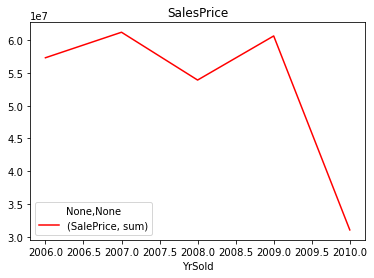

In [16]:
year_sales.plot(kind = 'line', y =('SalePrice','sum'),color ='r', title = 'SalesPrice')

In [17]:
columns = ['Neighborhood', 'YrSold', 'SalePrice']
df_pivot = data[columns]
year_sales = pd.DataFrame(df_pivot.groupby(['Neighborhood', 'YrSold']).SalePrice.sum())
year_sales

SalePrice
Neighborhood YrSold           
Blmngtn      2006      1519609
             2007       366701
             2008       350895
             2009       883600
             2010       192000
...                        ...
Timber       2009      1963500
             2010      1225800
Veenker      2006       820000
             2007      1074500
             2008       732000

[119 rows x 1 columns]

In [18]:
year_sales.reset_index(level='Neighborhood', inplace=True)
year_sales

,Neighborhood,SalePrice
YrSold,,
2006,Blmngtn,1519609
2007,Blmngtn,366701
2008,Blmngtn,350895
2009,Blmngtn,883600
2010,Blmngtn,192000
...,...,...
2009,Timber,1963500
2010,Timber,1225800
2006,Veenker,820000


In [45]:
df_pivot = pd.pivot_table(year_sales, index = year_sales.index,columns = ['Neighborhood'])
df_pivot

SalePrice                                                       \
Neighborhood    Blmngtn   Blueste    BrDale    BrkSide    ClearCr    CollgCr   
YrSold                                                                         
2006          1519609.0       NaN  387000.0  1691200.0  1195000.0  6368525.0   
2007           366701.0       NaN  341500.0  1357375.0  1418000.0  6419998.0   
2008           350895.0  151000.0  380900.0  1703900.0  1671932.0  6757850.0   
2009           883600.0  124000.0  474500.0  2294900.0   679500.0  7500393.0   
2010           192000.0       NaN   88000.0   193000.0   987400.0  2648100.0   

                                                          ...             \
Neighborhood    Crawfor    Edwards    Gilbert     IDOTRR  ...    NoRidge   
YrSold                                                    ...              
2006          2162987.0  2553670.0  4806015.0   670311.0  ...  2901000.0   
2007          3776774.0  2254000.0  3457391.0  1427200.0  ...  4397040.0   
2008          2289700.0  3444300.0  1860000.0   641500.0  ...  1828500.0   
2009          1621900.0  3344100.0  3999100.0   447900.0  ...  2591000.0   
2010           890500.0  1225900.0  1113000.0   517669.0  ...  2029568.0   

                                                                     \
Neighborhood    NridgHt    OldTown      SWISU     Sawyer    SawyerW   
YrSold                                                                
2006          5193362.0  3535059.0   520500.0  2545500.0  1318300.0   
2007          5594996.0  2755071.0   375000.0  2276900.0  2511600.0   
2008          3989074.0  3691750.0  1116900.0  1675709.0  2024880.0   
2009          7109157.0  2793079.0  1128384.0  1506183.0  2759012.0   
2010          2466249.0  1714500.0   424000.0  2118400.0  2393000.0   

                                                          
Neighborhood    Somerst    StoneBr     Timber    Veenker  
YrSold                                                    
2006          3364302.0  2190280.0  1851400.0   820000.0  
2007          5597974.0  1397926.0  2524176.0  1074500.0  
2008          4512620.0   980000.0  1640527.0   732000.0  
2009          4253670.0  1599837.0  1963500.0        NaN  
2010          1654100.0  1594432.0  1225800.0        NaN  

[5 rows x 25 columns]

<AxesSubplot:xlabel='YrSold'>

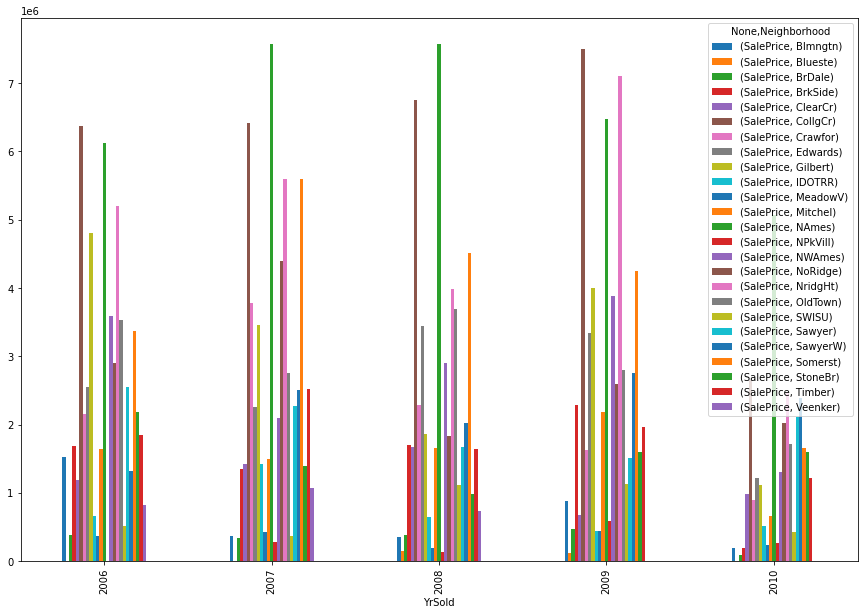

In [30]:
df_pivot.plot(kind = 'bar',figsize=(15,10))

In [42]:
columns = ['Neighborhood','SalePrice']
dfnew = data[columns]
dfnew = pd.DataFrame(dfnew.groupby('Neighborhood').SalePrice.sum())
dfnew = dfnew.sort_values(by='SalePrice',ascending=False)
dfnew = dfnew[:10]

In [43]:
dfnew.head()

,SalePrice
Neighborhood,
NAmes,32815593
CollgCr,29694866
NridgHt,24352838
Somerst,19382666
Gilbert,15235506


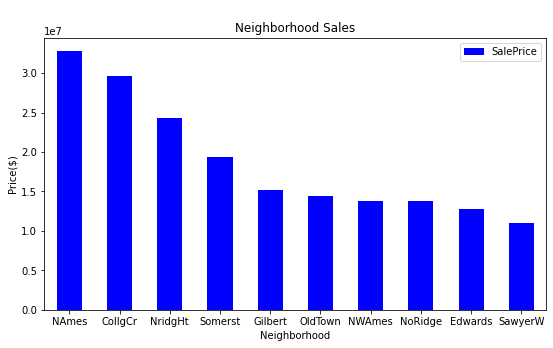

In [52]:
ax = dfnew.plot(kind='bar',title='\nNeighborhood Sales' , rot=0,figsize=(9,5), color='b')
ax.set_ylabel('Price($)')  #used rot make neighborhood look horizontal
plt.show()

In [53]:
##Analysing the features

In [54]:
import seaborn as sns

<AxesSubplot:>

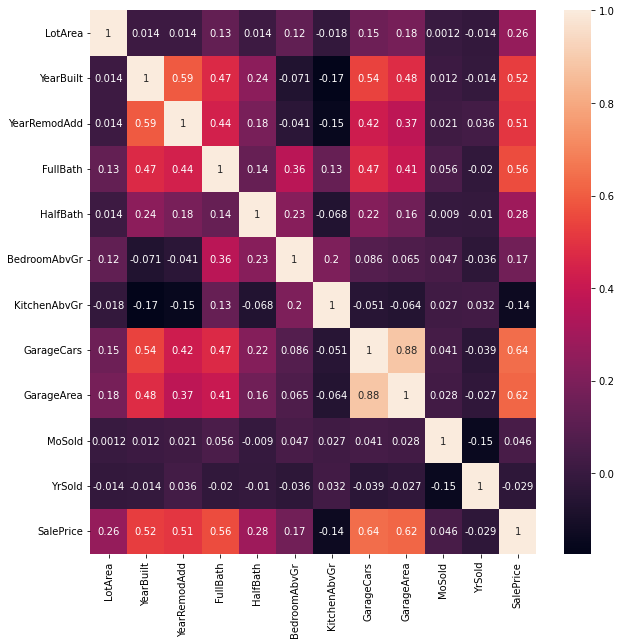

In [56]:
corr = data.corr()
fig,ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr,annot=True,ax=ax)

In [59]:
##visualizing prices for each feature with high correlatinon with salePrice
corr.loc[['SalePrice']]

,LotArea,YearBuilt,YearRemodAdd,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,GarageCars,GarageArea,MoSold,YrSold,SalePrice
SalePrice,0.263843,0.522897,0.507101,0.560664,0.284108,0.168213,-0.135907,0.640409,0.623431,0.046432,-0.028923,1.0


In [66]:
feats = []
line = corr.loc[['SalePrice']]
for c in corr.columns:
    if line[c][0] > 0.5 and line[c][0] < 1:
        feats.append(c)
feats.append('SalePrice')

In [67]:
df_ = data[feats]
df_.head()

,YearBuilt,YearRemodAdd,FullBath,GarageCars,GarageArea,SalePrice
0,2003,2003,2,2,548,208500
1,1976,1976,2,2,460,181500
2,2001,2002,2,2,608,223500
3,1915,1970,1,3,642,140000
4,2000,2000,2,3,836,250000


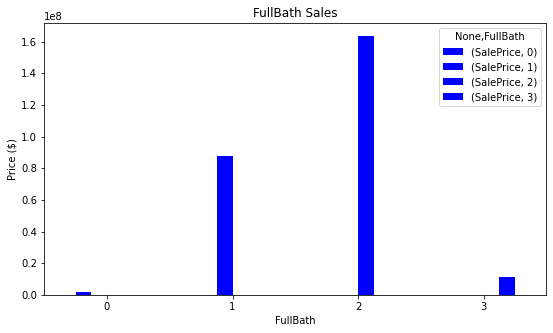

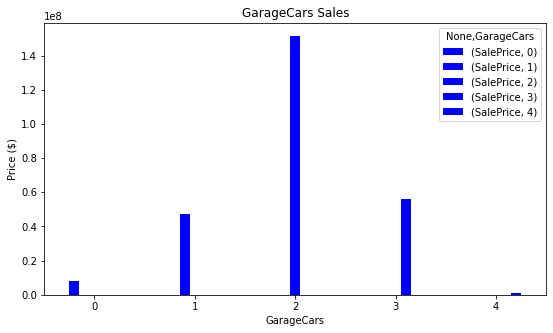

In [ ]:
for f in feats[2:-1]:
    plt.close()
    df_pivot = pd.DataFrame(df_.groupby(f).SalePrice.sum())
    df_pivot = pd.pivot_table(df_pivot, index=df_pivot.index, columns=[f], aggfunc='first')
    ax = df_pivot.plot(kind='bar', title=f'{f} Sales', rot=0, figsize=(9,5), color='b')
    ax.set_ylabel('Price ($)')
    plt.show()

In [69]:
data.dtypes

MSZoning         object
LotArea           int64
Street           object
Utilities        object
LotConfig        object
LandSlope        object
Neighborhood     object
YearBuilt         int64
YearRemodAdd      int64
RoofStyle        object
RoofMatl         object
ExterQual        object
Foundation       object
Electrical       object
FullBath          int64
HalfBath          int64
BedroomAbvGr      int64
KitchenAbvGr      int64
GarageType       object
GarageCars        int64
GarageArea        int64
MoSold            int64
YrSold            int64
SaleType         object
SaleCondition    object
SalePrice         int64
dtype: object

In [73]:
len(data.columns)

26